#Building a Simple Neural Network with Tensorflow 2

In [ ]:
import numpy as np
import pandas as pd
from random import random
from sklearn.model_selection import train_test_split

###Building a synthetic dataset and split into train and test data:

In [ ]:
def generate_dataset(num_samples, test_size):
  x = np.array([[random()/2 for _ in range(2)] for _ in range(num_samples)])    # Input
  y = np.array([[i[0] + i[1]] for i in x])                               # Output
  Xtr, Xts, ytr, yts = train_test_split(x, y, test_size=test_size)
  return Xtr, Xts, ytr, yts

In [ ]:
Xtr, Xts, ytr, yts = generate_dataset(5000, 0.3)
print("Xts: \n {}".format(Xts))
print("yts: \n {}".format(yts))
print("# of training samples:{}".format(Xtr.shape[0]))

Xts: 
 [[0.00928759 0.42979912]
 [0.15382976 0.10058799]
 [0.2956197  0.4303674 ]
 ...
 [0.31674498 0.16640678]
 [0.02991124 0.17360999]
 [0.12951837 0.39707009]]
yts: 
 [[0.43908671]
 [0.25441775]
 [0.7259871 ]
 ...
 [0.48315176]
 [0.20352122]
 [0.52658845]]
# of training samples:3500


###Start working with Tensorflow:

In [ ]:
import tensorflow as tf

**Keras:** High level library that sits on top of tensorflow and makes tf code super easy to use. Can build complex neural networks with just a simple line of code.

**Sequential:** To build a sequential neural network architecture. Left -> Right data model.

**Dense Layer:** Is a type of layer that fully connects all the neurons from previous layers to the current layer.

**Our Model:** 
Input Layer: 2 Neurons: -> Hidden Layer: 5 Neurons -> Output Layer: 1 Neuron

In [ ]:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(5, input_dim=2, activation="sigmoid"),
      tf.keras.layers.Dense(1, activation="sigmoid")
])

**Compile the model:**

- Optimizer: We are using a **Stochastic Gradient Descent(SGD)** Optimizer for our model. We are passing a learning rate of 0.1.

In [ ]:
optimiser = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=optimiser, loss="MSE")

**Train the model:**
 - Epochs: 

In [ ]:
model.fit(Xtr, ytr, epochs=100)

Epoch 1/100
110/110 [==============================] - 0s 1ms/step - loss: 4.1909e-04
Epoch 2/100
110/110 [==============================] - 0s 1ms/step - loss: 4.1899e-04
Epoch 3/100
110/110 [==============================] - 0s 1ms/step - loss: 4.1883e-04
Epoch 4/100
110/110 [==============================] - 0s 1ms/step - loss: 4.1878e-04
Epoch 5/100
110/110 [==============================] - 0s 1ms/step - loss: 4.1865e-04
Epoch 6/100
110/110 [==============================] - 0s 1ms/step - loss: 4.1862e-04
Epoch 7/100
110/110 [==============================] - 0s 1ms/step - loss: 4.1851e-04
Epoch 8/100
110/110 [==============================] - 0s 1ms/step - loss: 4.1834e-04
Epoch 9/100
110/110 [==============================] - 0s 1ms/step - loss: 4.1830e-04
Epoch 10/100
110/110 [==============================] - 0s 1ms/step - loss: 4.1822e-04
Epoch 11/100
110/110 [==============================] - 0s 1ms/step - loss: 4.1809e-04
Epoch 12/100
110/110 [==============================

**Evaluate the model:**

In [ ]:
print("Model Evaluation: ")
model.evaluate(Xts, yts, verbose=1)

Model Evaluation: 
47/47 [==============================] - 0s 914us/step - loss: 3.6635e-04


0.00036634679418057203

**Make Predictions:**

In [ ]:
data = np.array([[0.1, 0.2], [0.2, 0.2]])
predictions = model.predict(data)
for d, p in zip(data, predictions):
  print("{} + {} = {}".format(d[0], d[1], p[0]))

0.1 + 0.2 = 0.2848500609397888
0.2 + 0.2 = 0.38607174158096313


**Note:** To get a better accuracy, we need to tweak the parameters in our model like the learning rate in SGD, or our neural network architecture like how many layers, or how many neurons in each layer.

#Understanding audio data for deep learning:

**Sound wave can be described in some information:**
 - Time period (t)
 - Frequency/pitch: (f) = 1/t -> Higher frequency = Higher pitch
 - Amplitude/Loudness: Larger amplitude = Louder sound 
 - Timbre
 - Phase

**ADC(Analog to digital conversion):** Since sound is an analog signal, we need to convert it into a digital form.

Steps: 
 - Sampling: sound signal is sampled at uniform time intervals.
    - This uniform time interval given by *sampling rate* (in hertz).
        - Eg: 44, 100 Hz sampling rate means: we take around 44k sampling points in a second.
    - Also can be done using a bit depth (eg: 16 bits/channel).
 - Quantization: Amplitude quantised with limited # of bits.
    - More the bits to store amplitude, the better the quality of the sound will be.

**Fourier Transform:**
 - A way to get more information about complex sounds digitally.
 - It is a technique to decompose a complex periodic sound into sum of sine waves that oscillate at different frequencies.
 - This technique can work as long as the sound wave is periodic
 - Gives multiple sine waves from a periodic sound.
 - We are interested particularly in the amplitude in this case.
    - This is because an amplitude tells us that how much a particular frequency contributes to a particular sound.
    - Higher the amplitude of a particular frequency, the more it contributes to the particular frequency.

*Result:* the result of a fourier transform is a **power spectrum**.
 - Spectrum gives magnitude as a function of frequency.
 - We move from time domain to a frequency domain.
 - No time information is there now.

**Short time fourier transform:(STFT)**
 - since Fourier transform gives only a static snapshot of the frequencies, but an audio signal is a time series data, STFT solves this problem.
 - computes several FFT at different intervals.
 - it preserves information about time.
 - Done using fixed frame size: eg: 2048 samples. 
 - Gives a **spectogram:**
    - Time(in seconds)(x-axis) + frequency(in hz)(y-axis) + magnitude(in decibels)(color)


NOTE: Spectograms are fundamental for audio data preprocessing for Deep Learning.
 - We extract time and frequency domain features from the waveform and pass it to the machine learning models.


###Mel Frequency Cepstral Coefficients:
 - Captures Timbre/textural aspects of a sound
 - frequency domain feature
 - approximate human auditory sound.
 - 13 to 40 coefficients 
 - calculated at each frame.
 - used to perceive how humans process the audios.
 - Applications in:
    - Speech recognition
    - Music genre classification
    - Music instrument classification

###Working with Librosa:
 - Built on top of matplotlib
 - sr = sampling rate in hertz.

In [ ]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
file = "blues.00000.wav"
signal, sr = librosa.load(file, sr=22050)
# Signal is a 1d numpy array containing values: sr*duration of sound. 
# i.e: 22050 * 30(s) = more than 600k values

print("Signal: {}, sampling rate: {}".format(signal, sr))

Signal: [ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847], sampling rate: 22050


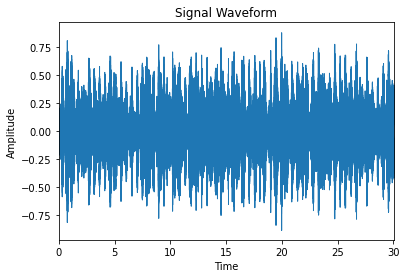

In [ ]:
librosa.display.waveplot(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Signal Waveform")
plt.show()

###Moving from time domain to frequency domain feature for the song:

In [ ]:
# Performing a FFT spectrum
# Gives a numpy array with as many values as total # samples in the waveform signal.
# We will use this to get the magnitude of this value.

fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))
# Linspace gives number of evenly spaced numbers in an interval.(in hertz)

From the plot we can see that the energy is concentrated in the lower frequencies.
Also, we can observe that the plot is symmetrical, and the point of symmetry is half the sampling rate
That means we donot need the entire plot, just half of it.


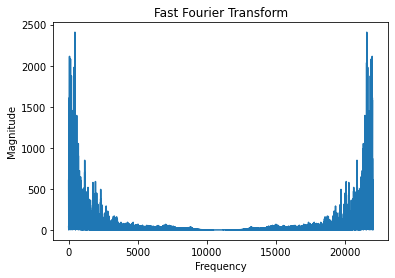

In [ ]:
plt.plot(frequency, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Fast Fourier Transform")
plt.plot()

print("From the plot we can see that the energy is concentrated in the lower frequencies.")
print("Also, we can observe that the plot is symmetrical, and the point of symmetry is half the sampling rate")
print("That means we donot need the entire plot, just half of it.")

###Fast Fourier Transform:
- Also can be called as a Static snapshot of the soundtrack.
- Average of different frequency bins throughout the whole sound.
- Tells us how these frequencies are contributing to the overall sound in time.

Also can be called as a Static snapshot of the soundtrack
Average of different frequency bins throughout the whole sound
Tells us how these frequencies are contributing to the overall sound in time.


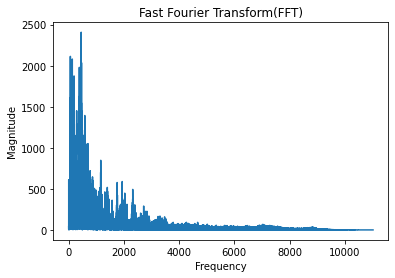

In [ ]:
left_frequency = frequency[0:int(len(frequency)/2)]
left_magnitude = magnitude[0:int(len(magnitude)/2)]
plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Fast Fourier Transform(FFT)")
plt.plot()

print("Also can be called as a Static snapshot of the soundtrack")
print("Average of different frequency bins throughout the whole sound")
print("Tells us how these frequencies are contributing to the overall sound in time.")

###Short time Fourier Transform(STFT):
- n_fft = # of samples per fft.
- hop_length = amount we're shifting each FFT to the right

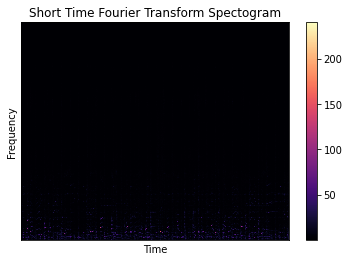

Most of the frequencies have very low amplitudes. (Zoom in)


In [ ]:
stft = librosa.core.stft(signal, n_fft=2048, hop_length=512)

spectogram = np.abs(stft)

librosa.display.specshow(spectogram, sr=sr, hop_length=512)
plt.title("Short Time Fourier Transform Spectogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

print("Most of the frequencies have very low amplitudes. (Zoom in)")

###Log spectogram:

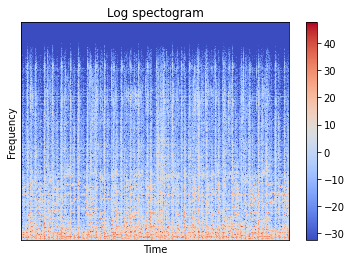

You can see, most of the energies are concentrated in the lower frequencies.


In [ ]:
log_spectogram = librosa.amplitude_to_db(spectogram)
librosa.display.specshow(log_spectogram, sr=sr, hop_length=512)
plt.title("Log spectogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

print("You can see, most of the energies are concentrated in the lower frequencies.")

###Mel-frequency cepstral coefficients(MFCC):
 - mfcc's of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. 
 - In MIR, it is often used to describe timbre.
 - n_mfcc = # of mfcc coefficients we want to extract.

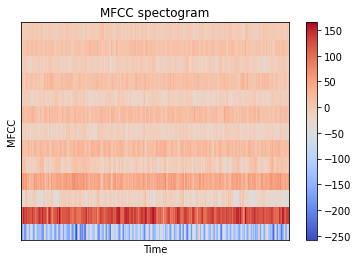

On y axis, we can see there are 13 intervals/coefficients extracted


In [ ]:
mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length=512, n_mfcc=13)

librosa.display.specshow(mfcc)
plt.title("MFCC spectogram")
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()

print("On y axis, we can see there are 13 intervals/coefficients extracted")

#Importing Music data from kaggle

In [1]:
import os
#Upload kaggle.json in the colab session first.
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [3]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification
# This is the API Command found on the particular dataset's page on kaggle.

 99% 1.20G/1.21G [00:05<00:00, 205MB/s]
100% 1.21G/1.21G [00:05<00:00, 218MB/s]


In [4]:
# Rename the zip file
os.rename("gtzan-dataset-music-genre-classification.zip", "music_genre.zip") 

In [5]:
from zipfile import ZipFile
filename = "music_genre.zip"

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print("Extracting the dataset... Done")

Extracting the dataset... Done


In [6]:
# Remove a faulty file
file_to_remove = "Data/genres_original/jazz/jazz.00054.wav"
if os.path.exists(file_to_remove):
  os.remove(file_to_remove)
  print("The file is removed successfully")
else:
  print("The file does not exist")

#Music Genre Classification:

###Prepare a dataset:
 - extract the inputs and the target from the music dataset, like labels and mfcc's,
 - store that in a json file to use it later on in the neural network.
 - You could normalize the mfcc's if there are very large.

In [7]:
import librosa
import os
import math
import json

In [8]:
DATASET_PATH = "Data/genres_original"
JSON_PATH = "data.json"
SAMPLE_RATE = 22050  # in hertz
DURATION = 30 #seconds
SAMPLES_PER_TRACK = SAMPLE_RATE*DURATION

In [9]:
def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
  # num_segments is used to train the machine learning model since we have less data.
  # json_path is where we will be saving all the labels for the sound track.
  # hop_length is used for librosa, which tells by how much interval we should go to the next frame.
  # n_fft = # of intervals we want in one Fast Fourier Transform.

  #Steps: 

  # 1. Build Dictionary to store the data.
  data = {
      "mapping": [],                          # mapping different genre labels to numbers.
      "mfcc": [],                             # mfcc's are the training inputs
      "labels": []                            # labels are the target/outputs of the ML model.
      # Classical is 0, blues is 1.
  }
  num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
  expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length)

  # 2. Loop through all the genres folders and analyze all the songs.
  for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
    
    # ensure that we are not at the root level
    if dirpath is not dataset_path:
      #save semantic label in mapping
      dirpath_components = dirpath.split("/")  #genre/blues => [genre, blues]
      semantic_label = dirpath_components[-1]  # -1 means last index
      data["mapping"].append(semantic_label)
      print("\nProcessing {}".format(semantic_label))

      # process files for a specific genre:
      for f in filenames:
        file_path = os.path.join(dirpath, f) # load the audio file here.
        signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)

        # Process segments to extract mfcc and store them.
        for s in range(num_segments):
          start_sample = num_samples_per_segment * s # s is the current segment.
          # for s = 0, start sample = 0, finish sample = 0 + # samples per segment.
          finish_sample = start_sample + num_samples_per_segment
          # These two variables are used to analyze just a slice of the signal.

          mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample], 
                                      sr=sr, 
                                      n_mfcc=n_mfcc,
                                      n_fft=n_fft,
                                      hop_length=hop_length)
          
          mfcc = mfcc.T
          
          # store mfcc for segment if it has expected length:
          if len(mfcc) == expected_num_mfcc_vectors_per_segment:
            data["mfcc"].append(mfcc.tolist())   
            # to save it as a json file, cast mfcc(numpy array) to a list.
            data["labels"].append(i - 1)
            print("{}, segment: {}".format(file_path, s))
  with open(json_path, "w") as fp:
    json.dump(data, fp, indent=4)


In [10]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)

Streaming output truncated to the last 5000 lines.
Data/genres_original/country/country.00023.wav, segment: 9

Processing disco
Data/genres_original/disco/disco.00081.wav, segment: 0
Data/genres_original/disco/disco.00081.wav, segment: 1
Data/genres_original/disco/disco.00081.wav, segment: 2
Data/genres_original/disco/disco.00081.wav, segment: 3
Data/genres_original/disco/disco.00081.wav, segment: 4
Data/genres_original/disco/disco.00081.wav, segment: 5
Data/genres_original/disco/disco.00081.wav, segment: 6
Data/genres_original/disco/disco.00081.wav, segment: 7
Data/genres_original/disco/disco.00081.wav, segment: 8
Data/genres_original/disco/disco.00081.wav, segment: 9
Data/genres_original/disco/disco.00054.wav, segment: 0
Data/genres_original/disco/disco.00054.wav, segment: 1
Data/genres_original/disco/disco.00054.wav, segment: 2
Data/genres_original/disco/disco.00054.wav, segment: 3
Data/genres_original/disco/disco.00054.wav, segment: 4
Data/genres_original/disco/disco.00054.wav, seg

###Neural Network for Multiclass classification:

In [11]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

**Load the data:**

In [12]:
def load_data(dataset_path):
  with open(dataset_path, "r") as fp:
    data = json.load(fp)
  # convert list into numpy arrays
  inputs = np.array(data["mfcc"])
  targets = np.array(data["labels"])

  return inputs, targets

In [13]:
inputs, targets = load_data("data.json")
print(inputs.shape)
print(targets.shape)

(9986, 130, 13)
(9986,)


In [14]:
print(inputs[0][0])

[-579.19775391  124.48126984    4.32961702   13.83847237    5.52621984
   -7.01009274   -1.17432785   10.06445694   15.42344284   15.24864006
   13.70017242    4.72934103   -6.39323425]


**Split the data into training and test:**

In [15]:
Xtr, Xts, ytr, yts = train_test_split(inputs, targets, test_size=0.3)

**Build the network architecture:**

**Rectified Linear Unit(ReLU):** 
 - an activation function used in a keras neural network.
 - Has a better convergence than a Sigmoid function
 - Reduced probability of vanishing gradient.
 - when compared to the sigmoid, it enabled us to train the model way faster.

In [16]:
model = keras.Sequential([
    # input layer: Flatten takes a multidimension array and flattens it out.
    # 1st dim = incibels, 2nd dim = values for MFCC (13 mfcc's will be extracted.)
    # index 0 represent different segments.
          keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),

    # hidden layer 1: 
    #1st par = 512 neurons, relu = Rectified Linear Unit or ReLU
          keras.layers.Dense(512, activation="relu"),
    # hidden layer 2: 
    #1st par = 512 neurons, relu = Rectified Linear Unit or ReLU
          keras.layers.Dense(256, activation="relu"),
    # hidden layer 3: 
    #1st par = 512 neurons, relu = Rectified Linear Unit or ReLU
          keras.layers.Dense(64, activation="relu"),
    # output layer:
          keras.layers.Dense(10, activation="softmax")
    # since we have 10 labels, we're putting 10 here. 
    # we then pick the neuron which has the highest value
    # This neuron will represent the category we are trying to predict.

])

**Compile the network:**
- using the *adam* optimizer is a variation of the classic gradient descent.
- is very effective while used with deep learning.
- we are using the "*sparse_categorical_crossentropy*" as our loss function because this is a multiclass classification problem.

In [17]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001, clipnorm=1)
model.compile(optimizer=optimizer, 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               865792    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


**Train the network:**

**Types of batching:**
- *Stochastic:*
    - calculate gradient on 1 sample.
    - quick, but inaccurate.
    - eg: batch_size = 1
- *Full batch:*
    - Compute Gradient on the whole training set
    - Slow, memory intensive but accurate
- *Mini Batch:*
    - Compute data on a subset of data set(16-128 samples can be choosen)
    - best of the above.


In [18]:
history = model.fit(Xtr, ytr, 
          validation_data=(Xts, yts),
          epochs=50,
          batch_size=128)

Epoch 1/50
55/55 [==============================] - 4s 11ms/step - loss: 18.6375 - accuracy: 0.2264 - val_loss: 6.4002 - val_accuracy: 0.3485
Epoch 2/50
55/55 [==============================] - 0s 4ms/step - loss: 5.1453 - accuracy: 0.3851 - val_loss: 4.5904 - val_accuracy: 0.3732
Epoch 3/50
55/55 [==============================] - 0s 4ms/step - loss: 3.3008 - accuracy: 0.4314 - val_loss: 3.6741 - val_accuracy: 0.4012
Epoch 4/50
55/55 [==============================] - 0s 4ms/step - loss: 2.4483 - accuracy: 0.5020 - val_loss: 3.1372 - val_accuracy: 0.4459
Epoch 5/50
55/55 [==============================] - 0s 4ms/step - loss: 1.9236 - accuracy: 0.5533 - val_loss: 2.9100 - val_accuracy: 0.4362
Epoch 6/50
55/55 [==============================] - 0s 4ms/step - loss: 1.5052 - accuracy: 0.6045 - val_loss: 2.8179 - val_accuracy: 0.4653
Epoch 7/50
55/55 [==============================] - 0s 5ms/step - loss: 1.3373 - accuracy: 0.6379 - val_loss: 2.7533 - val_accuracy: 0.4656
Epoch 8/50
55/55 [

In [19]:
def plot_history(history):
  # build subplots for error and accuracy.
  fig, axis = plt.subplots(2)

  # create accuracy subplot
  axis[0].plot(history.history["accuracy"], label="train accuracy")
  axis[0].plot(history.history["val_accuracy"], label="test accuracy")
  axis[0].set_ylabel("Accuracy")
  axis[0].legend(loc="lower right")
  axis[0].set_title("Accuracy evaluation")

  # create error subplot
  axis[1].plot(history.history["loss"], label="train error")
  axis[1].plot(history.history["val_loss"], label="test error")
  axis[1].set_ylabel("Error")
  axis[1].set_xlabel("Epochs")
  axis[1].legend(loc="upper right")
  axis[1].set_title("Error evaluation")

  plt.show()


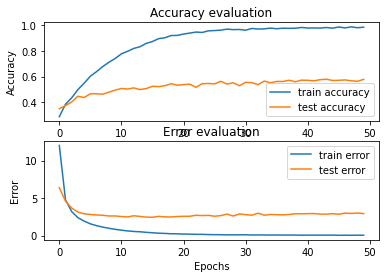

In [20]:
plot_history(history)

###Solving overfitting:

####**To solve overfitting:**
 - Simpler architecture
    - remove some layers
    - Decrease # neurons in each layer
    - just hit and trail methods
 - Audio Data Augmentation
    - Artificially increase # of training samples
    - apply transformations to audio files as: 
        - pitch shifting
        - time stretching
        - adding background noise
 - Early stopping: 
    - choose rules to stop the training.
    - Eg: after 7 iterations, if error does not decrease, stop the training. 
    - how many epochs to wait before stopping.
 - Dropout:
  - randomly drop neurons while training.
  - this increases network robustness.
  - Dropout probability: 0.1 - 0.5 (has a 10 - 50% of dropping neurons in different layers.)
  - performed dropout in the hidden layers above.
 - Regularization:
  - Add penalty to error function 
  - Punish Large weights
  - L1 regularization
    - L1: minimize abs of the weights.
    - robust to outliers
    - lambda is the regularization hyper parameter we can tweak.
    - generates simpler models.
  - L2 regularization: 
    - minimizes squared value of weights
    - not robust to outliers
    - But it learns complex patterns
    - doing L2 regularization above.

*NOTE:* Use L2 regularization in music and speech.

In [21]:
model = keras.Sequential([
    # input layer: Flatten takes a multidimension array and flattens it out.
    # 1st dim = incibels, 2nd dim = values for MFCC (13 mfcc's will be extracted.)
    # index 0 represent different segments.
          keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),

    # hidden layer 1: 
    #1st par = 512 neurons, relu = Rectified Linear Unit or ReLU
          keras.layers.Dense(512, activation="relu"),
          keras.layers.Dropout(rate=0.3),
    # hidden layer 2: 
    #1st par = 512 neurons, relu = Rectified Linear Unit or ReLU
          keras.layers.Dense(256, activation="relu"),
          keras.layers.Dropout(rate=0.3),
    # hidden layer 3: 
    #1st par = 512 neurons, relu = Rectified Linear Unit or ReLU
          keras.layers.Dense(64, activation="relu"),
          keras.layers.Dropout(rate=0.3),
    # output layer:
          keras.layers.Dense(10, activation="softmax")
          
    # since we have 10 labels, we're putting 10 here. 
    # we then pick the neuron which has the highest value
    # This neuron will represent the category we are trying to predict.

])

In [22]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001, clipnorm=1)
model.compile(optimizer=optimizer, 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               865792    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

In [23]:
history = model.fit(Xtr, ytr, 
          validation_data=(Xts, yts),
          epochs=50,
          batch_size=128)

Epoch 1/50
55/55 [==============================] - 1s 7ms/step - loss: 59.9387 - accuracy: 0.1344 - val_loss: 4.0321 - val_accuracy: 0.2533
Epoch 2/50
55/55 [==============================] - 0s 5ms/step - loss: 11.7035 - accuracy: 0.1800 - val_loss: 2.3535 - val_accuracy: 0.2019
Epoch 3/50
55/55 [==============================] - 0s 4ms/step - loss: 5.1211 - accuracy: 0.1882 - val_loss: 2.1782 - val_accuracy: 0.2006
Epoch 4/50
55/55 [==============================] - 0s 5ms/step - loss: 3.2546 - accuracy: 0.1833 - val_loss: 2.1973 - val_accuracy: 0.1706
Epoch 5/50
55/55 [==============================] - 0s 5ms/step - loss: 2.6062 - accuracy: 0.1771 - val_loss: 2.1748 - val_accuracy: 0.1772
Epoch 6/50
55/55 [==============================] - 0s 5ms/step - loss: 2.3980 - accuracy: 0.1929 - val_loss: 2.1250 - val_accuracy: 0.1866
Epoch 7/50
55/55 [==============================] - 0s 5ms/step - loss: 2.2607 - accuracy: 0.2096 - val_loss: 2.0959 - val_accuracy: 0.2463
Epoch 8/50
55/55 [

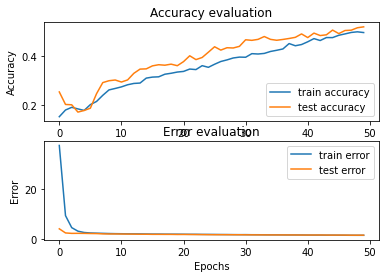

In [24]:
plot_history(history)

In [25]:
model.predict(Xts, yts)

ValueError: ignored

**Saving the model in pickle file finally:**

In [28]:
from keras.models import load_model

model.save('model_audio_final_neural.h5')
print("Saved model successfully")

Saved model successfully


In [29]:
# filename = 'model_audio_final_neural.pkl'
# pickle.dump(model, open(filename, 'wb'))
# keras.models.save_model(model=model, filepath="/model", overwrite=True)

In [30]:
from google.colab import files
files.download('model_audio_final_neural.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>